In [2]:
from IPython.display import HTML, Video, clear_output, Audio

import librosa
import librosa.feature
import librosa.display

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

import numpy as np
from scipy import signal
from sklearn.mixture import GaussianMixture
import sklearn
from sklearn.metrics.pairwise import cosine_similarity

import torch
import torchaudio

import pandas as pd
import os
import re


from FSDDComparisonHelp import FSDD, getMFCC, getTwoMFCCs, showMFCC, compareFeatures

# plt.style.use("classic")
# plt.style.use("bmh")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True

# Male and female MFCCs

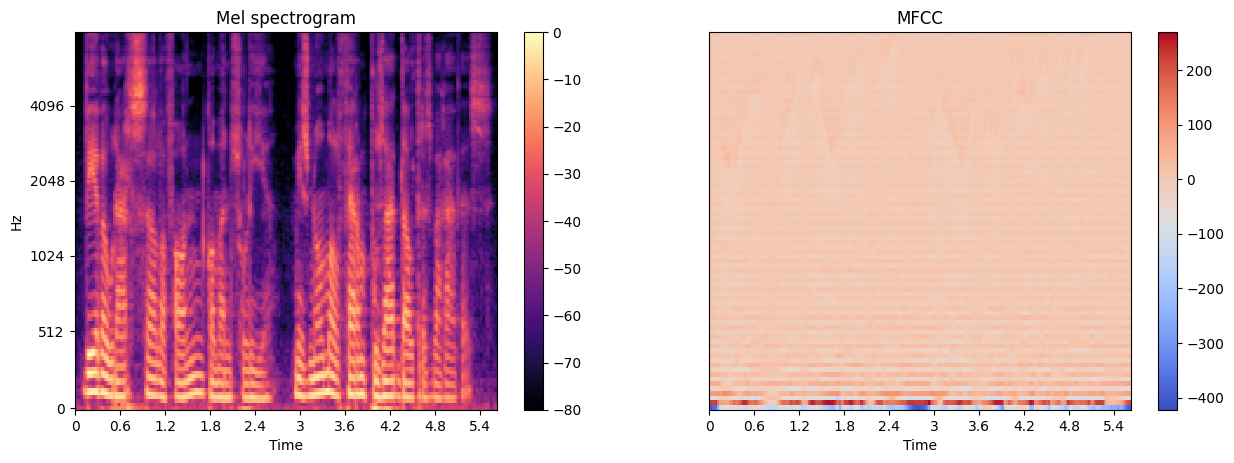

In [3]:
showMFCC('./sounds/speech-male.wav')

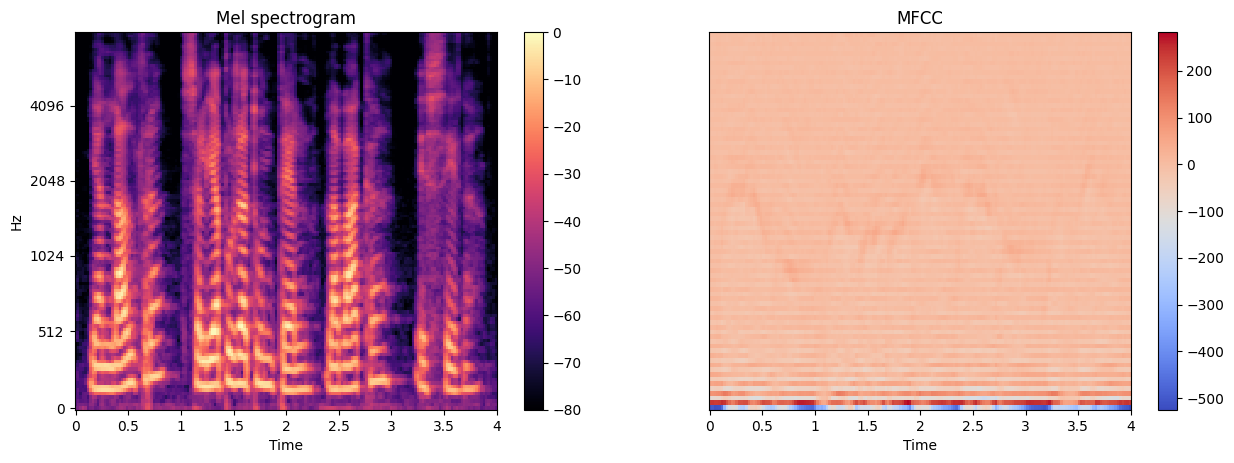

In [4]:
showMFCC('./sounds/speech-female.wav')

c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarnin

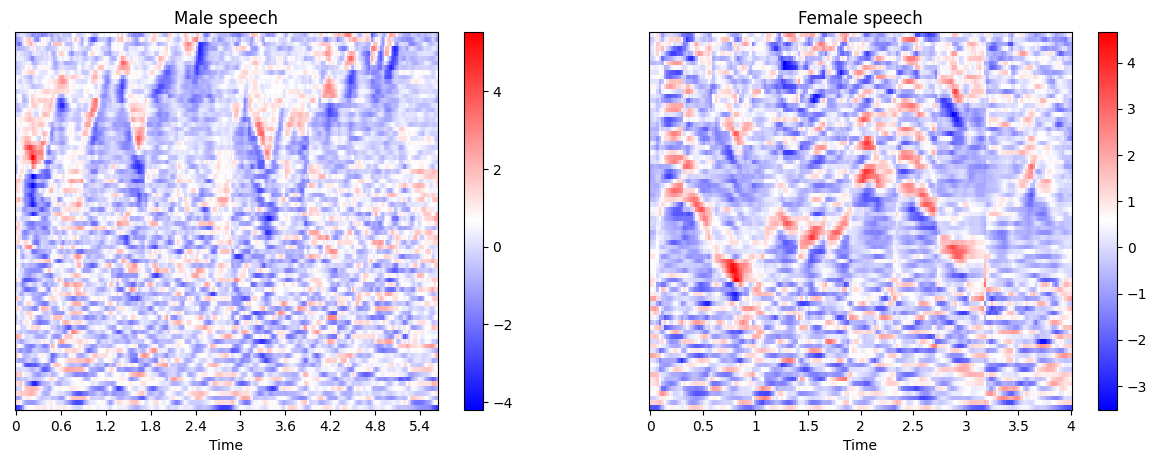

In [5]:
mfccMale, srMale = getMFCC('./sounds/speech-male.wav', useStd=True)
mfccFemale, srFemale = getMFCC('./sounds/speech-female.wav', useStd=True)

fig, ax = compareFeatures(mfccMale, srMale, mfccFemale, srFemale, 'Male speech', 'Female speech')
plt.show()

c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarnin

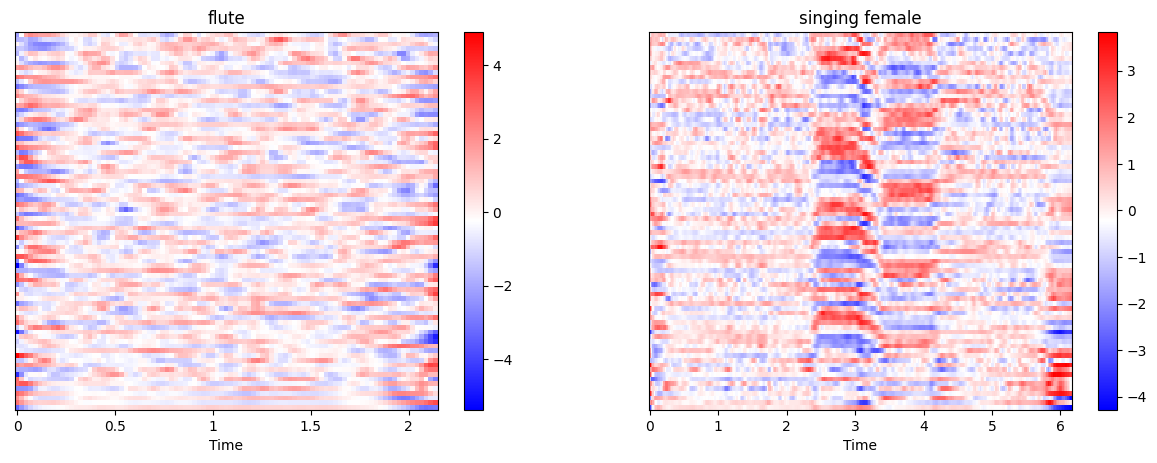

In [6]:
mfccFlute, srFlute = getMFCC('./sounds/flute-A4.wav', useStd=True)
mfccSingingFemale, srSingFem = getMFCC('./sounds/singing-female.wav', useStd=True)

fig, ax = compareFeatures(mfccFlute, srFlute, mfccSingingFemale, srSingFem, 'flute', 'singing female')

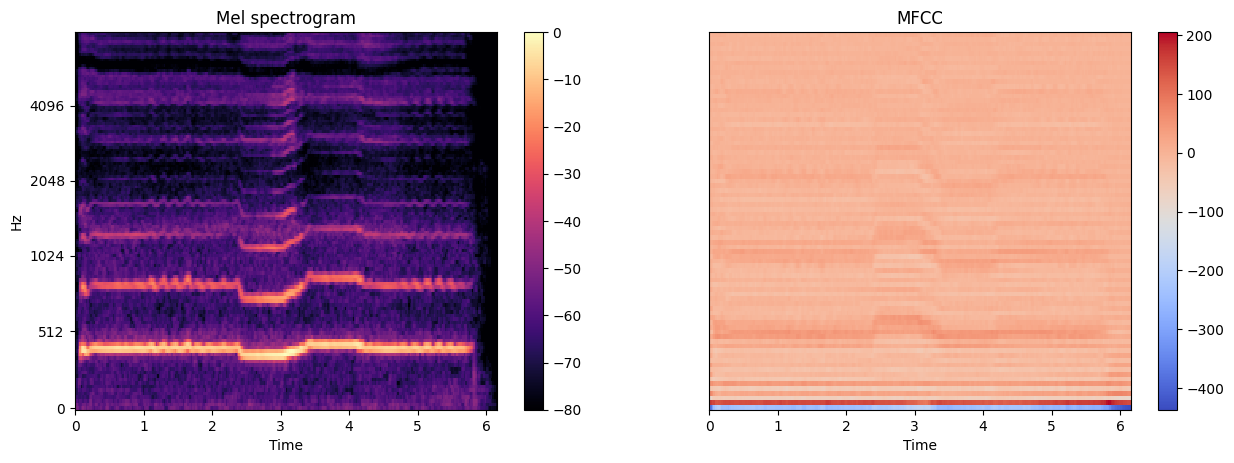

In [7]:
showMFCC('./sounds/singing-female.wav')

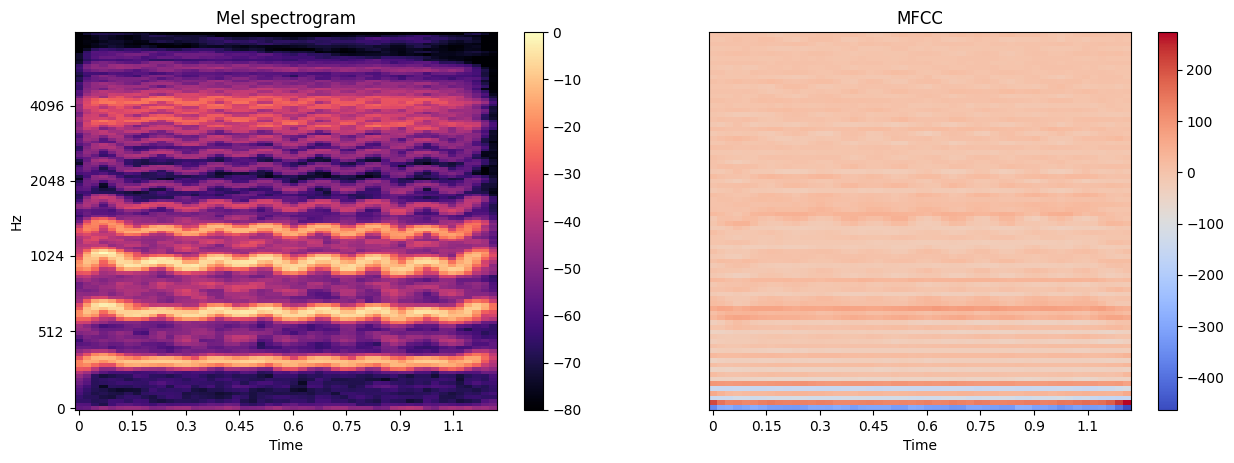

In [8]:
showMFCC('./sounds/soprano-E4.wav')

In [9]:
# tempo, _ = librosa.beat.beat_track(y, sr = s)

In [10]:
def getFeatureValue(y, sr, feature):
    if feature == 'mfcc':
        pass
    elif feature == 'chroma_stft':
        pass
    elif feature == 'spectrogram':
        pass

In [11]:
fsdd = FSDD('../Datasets/FSDD/recordings')
filesA, filesB = fsdd.getFilesForDigit(0, spkA=0, spkB=3)
files = filesA

In [12]:
mse = torch.nn.MSELoss()
cosSim = torch.nn.CosineSimilarity(dim=0, eps=1e-6)

lossMatrix = np.zeros((len(files), len(files)))
dtwDistMatrix = np.zeros((len(files), len(files)))
simMatrix = np.zeros((len(files), len(files)))

for i in range(len(files)):
	for j in range(len(files)):
		y, sr = librosa.load(files[i])
		# n_fft = 2048 by default hop_length=512
		# featureA = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=80, dct_type=3, n_fft=4096, hop_length=512)
		# featureA = librosa.feature.chroma_stft(y=y, sr=sr)
		featureA = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
		# mfcc_stdA = sklearn.preprocessing.scale(featureA, axis=1)

		y, sr = librosa.load(files[j])
		# n_fft = 2048 by default hop_length=512
		# featureB = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=80, dct_type=3, n_fft=4096, hop_length=512)
		# featureB = librosa.feature.chroma_stft(y=y, sr=sr)
		featureB = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
		# mfcc_stdB = sklearn.preprocessing.scale(featureB, axis=1)
		# print(featureA.shape, '\t', featureB.shape)
		
		if featureA.shape == featureB.shape:
			lossMatrix[i, j] = mse(torch.tensor(featureA), torch.tensor(featureB))
			if i != j : simMatrix[i, j] = cosSim(torch.tensor(featureA), torch.tensor(featureB)).max()
		D, wp = librosa.sequence.dtw(featureA, featureB, subseq=True)
		dtwDistMatrix[i, j] = D[-1, -1]

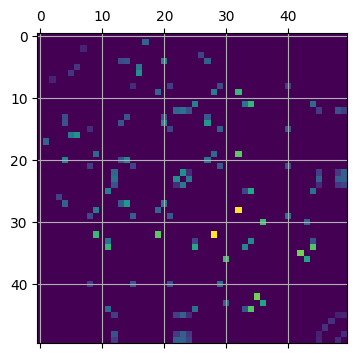

In [13]:
plt.matshow(lossMatrix)
plt.show()

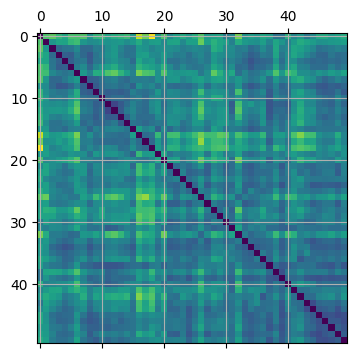

In [14]:
plt.matshow(dtwDistMatrix)
plt.show()

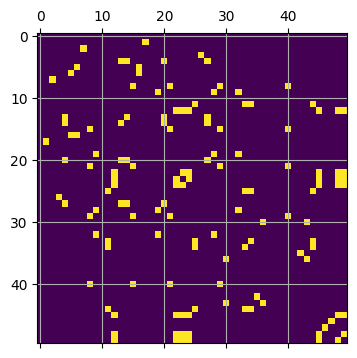

In [15]:
plt.matshow(simMatrix)
plt.show()

Total cost: 2631.245395339811


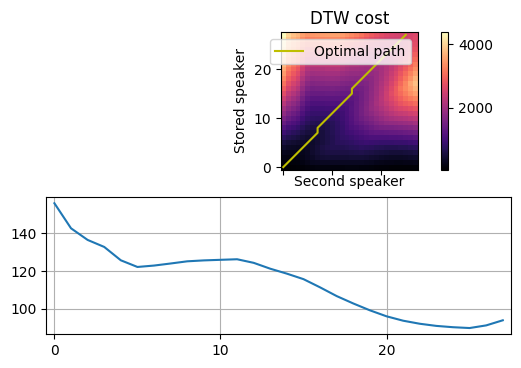

In [16]:
X, srx, Y, sry = getTwoMFCCs(files[6], files[16])
D, wp = librosa.sequence.dtw(X, Y, subseq=True)
print(f'Total cost: {D[-1, -1]}')

fig, ax = plt.subplots(nrows=2, sharex=True)

img = librosa.display.specshow(D, x_axis='frames', y_axis='frames', ax=ax[0])
ax[0].set(title='DTW cost', xlabel='Second speaker', ylabel='Stored speaker')
ax[0].plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
ax[0].legend()
fig.colorbar(img, ax=ax[0])

ax[1].plot(D[-1, :] / wp.shape[0])
# ax[1].set(xlim=[0, Y.shape[1]], ylim=[0, 2], title='Matching cost function')
plt.show()

In [17]:
print(f'Max loss: {lossMatrix.max()   }\t at { np.unravel_index(lossMatrix.argmax(),    lossMatrix.shape)}')
print(f'Max dist: {dtwDistMatrix.max()}\t at { np.unravel_index(dtwDistMatrix.argmax(), dtwDistMatrix.shape)}')
print(f'Max sim: {simMatrix.max()}\t at { np.unravel_index(simMatrix.argmax(), simMatrix.shape)}')

minSim = np.min(simMatrix[np.nonzero(simMatrix)])
minSimLoc = np.unravel_index(np.where(simMatrix == minSim), simMatrix.shape) # zero-th are both 0
print(f'Min sim: {minSim}\t at { minSimLoc }')

Max loss: 535.9606323242188	 at (28, 32)
Max dist: 2462.863648127239	 at (0, 18)
Max sim: 0.9995769262313843	 at (45, 49)
Min sim: 0.9917609691619873	 at (array([[0, 0],
       [0, 0]], dtype=int64), array([[19, 32],
       [32, 19]], dtype=int64))


On diag mse loss is 0

In [18]:
Audio(files[45])

In [19]:
Audio(files[46])

In [20]:
def compareSpeakers(speakerA, speakerB, useStd=False):

	mse = torch.nn.MSELoss()
	cosSim = torch.nn.CosineSimilarity(dim=0, eps=1e-6)

	scaler = sklearn.preprocessing.StandardScaler()
	
	lossMatrix = np.zeros((len(speakerA), len(speakerB)))
	dtwDistMatrix = np.zeros((len(speakerA), len(speakerB)))
	simMatrix = np.zeros((len(files), len(files)))

	for i in range(len(speakerA)):
		for j in range(len(speakerB)):
			y, sr = librosa.load(speakerA[i])
			# n_fft = 2048 by default hop_length=512
			# featureA = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=80, dct_type=3, n_fft=4096, hop_length=512)
			# featureA = librosa.feature.chroma_stft(y=y, sr=sr)
			featureA = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
			if useStd: featureA = sklearn.preprocessing.scale(featureA, axis=1)
			# if useStd: featureA = scaler.fit_transform(featureA)

			y, sr = librosa.load(speakerB[j])
			# n_fft = 2048 by default hop_length=512
			# featureB = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=80, dct_type=3, n_fft=4096, hop_length=512)
			# featureB = librosa.feature.chroma_stft(y=y, sr=sr)
			featureB = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
			if useStd: featureB = sklearn.preprocessing.scale(featureB, axis=1)
			# if useStd: featureA = scaler.fit_transform(featureB)
			if featureA.shape == featureB.shape:
				lossMatrix[i, j] = mse(torch.tensor(featureA), torch.tensor(featureB))
				if i != j : simMatrix[i, j] = cosSim(torch.tensor(featureA), torch.tensor(featureB)).max()
			D, wp = librosa.sequence.dtw(featureA, featureB, subseq=True)
			dtwDistMatrix[i, j] = D[-1, -1]

	return lossMatrix, dtwDistMatrix, simMatrix

In [21]:
loss, dtw, sim = compareSpeakers(filesA, filesB, useStd=False)

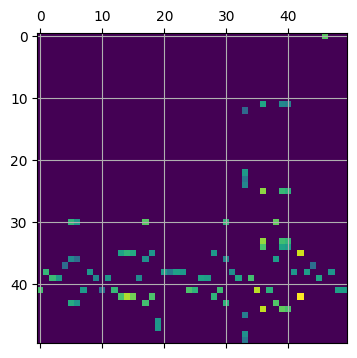

In [22]:
plt.matshow(loss)
plt.show()

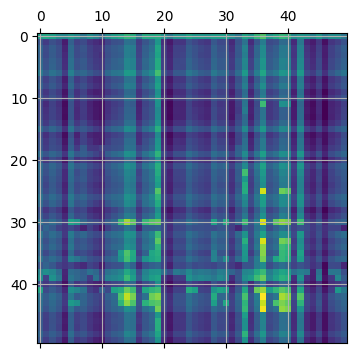

In [23]:
plt.matshow(dtw)
plt.show()

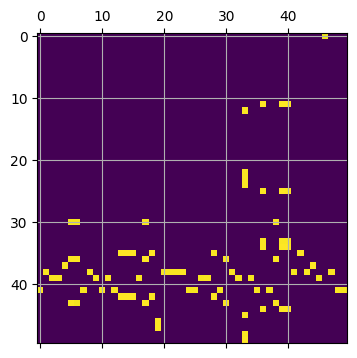

In [24]:
plt.matshow(sim)
plt.show()

Total cost: 2657.894581591181


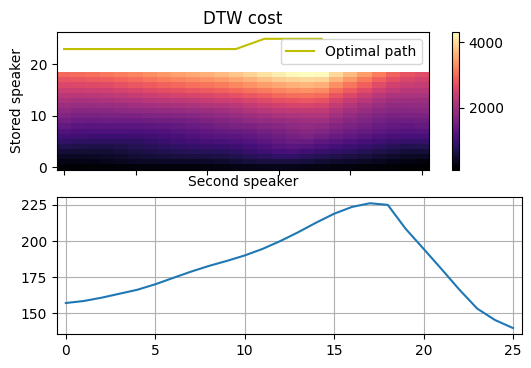

In [25]:
X, srx, Y, sry = getTwoMFCCs(filesA[1], filesB[13])
D, wp = librosa.sequence.dtw(X, Y, subseq=True)
print(f'Total cost: {D[-1, -1]}')

fig, ax = plt.subplots(nrows=2, sharex=True)

img = librosa.display.specshow(D, x_axis='frames', y_axis='frames', ax=ax[0])
ax[0].set(title='DTW cost', xlabel='Second speaker', ylabel='Stored speaker')
ax[0].plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
ax[0].legend()
fig.colorbar(img, ax=ax[0])

ax[1].plot(D[-1, :] / wp.shape[0])
# ax[1].set(xlim=[0, Y.shape[1]], ylim=[0, 2], title='Matching cost function')
plt.show()

In [26]:
minLoss = np.min(loss[np.nonzero(loss)])
minDist = np.min(dtw[np.nonzero(dtw)])

minLossLoc = np.unravel_index(np.where(loss == minLoss), loss.shape)[1] # zero-th are both 0
minDistLoc = np.unravel_index(np.where(dtw == minDist),  dtw.shape)[1]

minLossLoc = np.reshape(minLossLoc, 2)
minDistLoc = np.reshape(minDistLoc, 2)

print(f'Min loss: {minLoss}\t at { minLossLoc }')
print(f'Min dist: {minDist}\t at { minDistLoc }')

print(f'Max sim: {sim.max()}\t at { np.unravel_index(sim.argmax(), sim.shape)}')

minSim = np.min(sim[np.nonzero(sim)])
minSimLoc = np.unravel_index(np.where(sim == minSim), sim.shape) # zero-th are both 0
print(f'Min sim: {minSim}\t at { minSimLoc }')

Min loss: 1196.1561279296875	 at [12 33]
Min dist: 1455.651740675739	 at [11 46]
Max sim: 0.9975477457046509	 at (11, 39)
Min sim: 0.9717332124710083	 at (array([[0],
       [0]], dtype=int64), array([[ 0],
       [46]], dtype=int64))


In [27]:
Audio(filesA[41])

In [28]:
Audio(filesB[1])

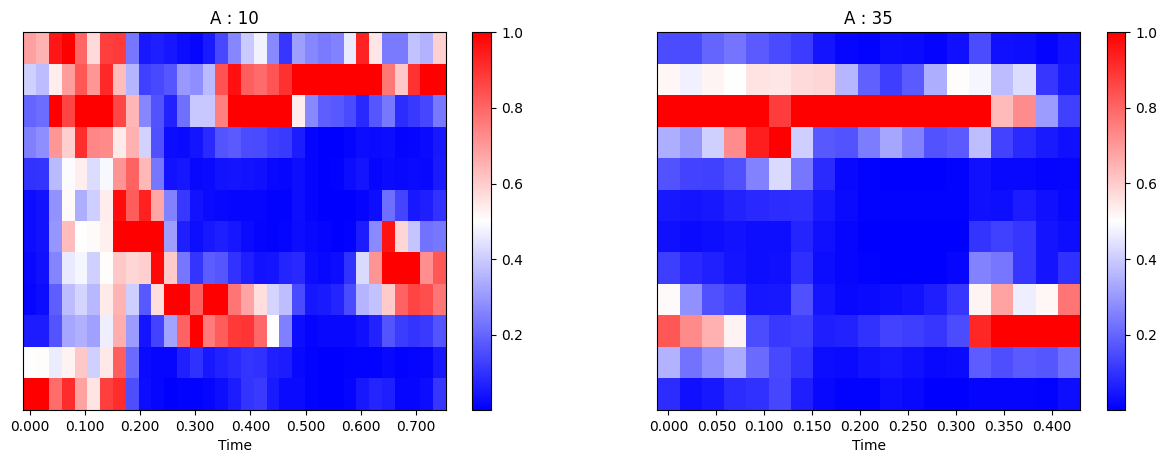

In [29]:
y, srx = librosa.load(filesA[10])
# X = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
# X = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=80, dct_type=3, n_fft=4096, hop_length=512)
X = librosa.feature.chroma_stft(y=y, sr=sr)
y, sry = librosa.load(filesA[35])
# Y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
# Y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=80, dct_type=3, n_fft=4096, hop_length=512)
Y = librosa.feature.chroma_stft(y=y, sr=sr)
fig, ax = compareFeatures(X, srx, Y, sry, 'A : 10', 'A : 35')
plt.show()

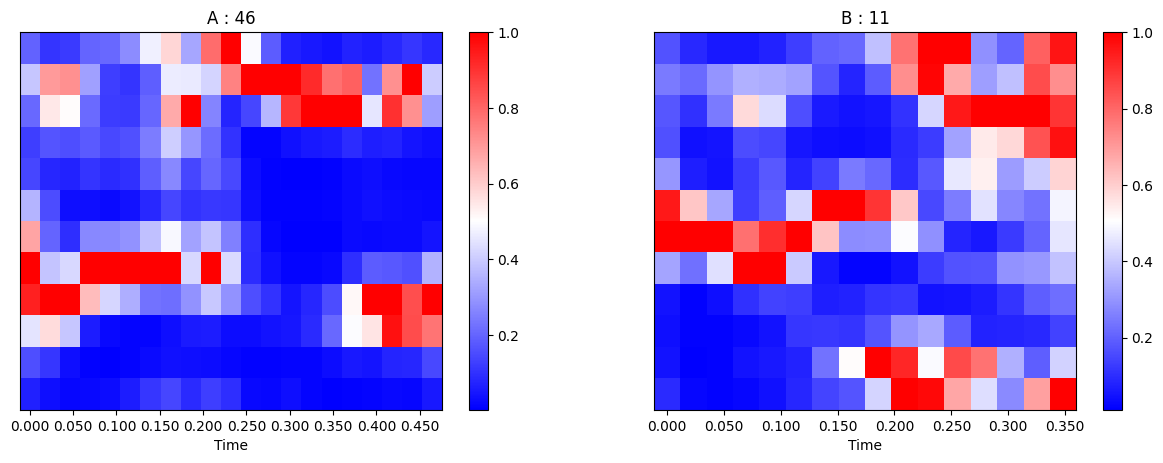

In [30]:
y, srx = librosa.load(filesA[46])  # 6
# X = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
# X = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=80, dct_type=3, n_fft=4096, hop_length=512)
X = librosa.feature.chroma_stft(y=y, sr=sr)
y, sry = librosa.load(filesB[11])  # 16
# Y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
# Y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=80, dct_type=3, n_fft=4096, hop_length=512)
Y = librosa.feature.chroma_stft(y=y, sr=sr)
fig, ax = compareFeatures(X, srx, Y, sry, 'A : 46', 'B : 11')
plt.show()

# Dynamic time warping

In [31]:
y, sr = librosa.load(librosa.ex('brahms'), offset=10, duration=15)

X = librosa.feature.chroma_cens(y=y, sr=sr)

noise = np.random.rand(X.shape[0], 200)
Y = np.concatenate((noise, noise, X, noise), axis=1)

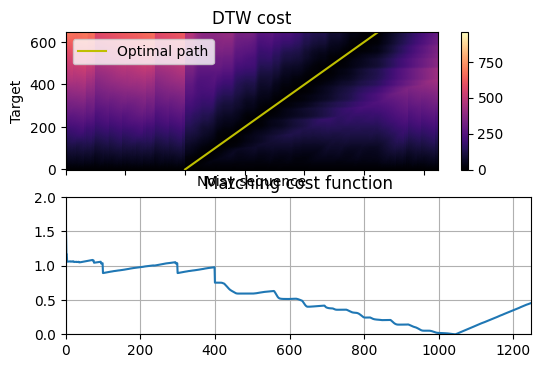

In [32]:
D, wp = librosa.sequence.dtw(X, Y, subseq=True)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(D, x_axis='frames', y_axis='frames',
                               ax=ax[0])
ax[0].set(title='DTW cost', xlabel='Noisy sequence', ylabel='Target')
ax[0].plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
ax[0].legend()
fig.colorbar(img, ax=ax[0])
ax[1].plot(D[-1, :] / wp.shape[0])
ax[1].set(xlim=[0, Y.shape[1]], ylim=[0, 2], title='Matching cost function')
plt.show()

Compare our data using code from DTW sample

In [33]:
y, sr = librosa.load(filesA[33])  # 6
X = librosa.feature.chroma_stft(y=y, sr=sr)
y, sr = librosa.load(filesB[12])  # 16
Y = librosa.feature.chroma_stft(y=y, sr=sr)

Distance: 2492.9374574468347


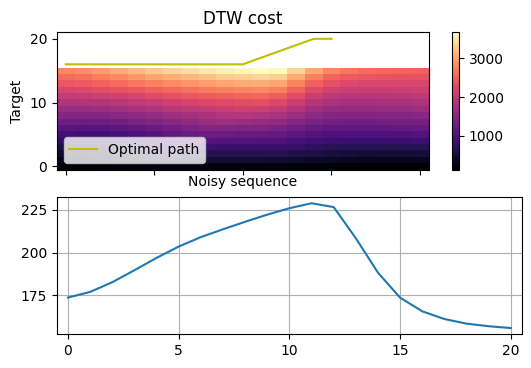

In [34]:
# X, srx, Y, sry = getTwoMFCCs(filesA[10], filesA[35])
# X, srx, Y, sry = getTwoMFCCs(filesA[33], filesB[12])
X, srx, Y, sry = getTwoMFCCs(filesA[46], filesB[11])
# X = sklearn.preprocessing.scale(X, axis=1)
# Y = sklearn.preprocessing.scale(Y, axis=1)
D, wp = librosa.sequence.dtw(X, Y, subseq=True)
print(f'Distance: {D[-1, -1]}')

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(D, x_axis='frames', y_axis='frames',
                               ax=ax[0])
ax[0].set(title='DTW cost', xlabel='Noisy sequence', ylabel='Target')
ax[0].plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
ax[0].legend()
fig.colorbar(img, ax=ax[0])
ax[1].plot(D[-1, :] / wp.shape[0])
# ax[1].set(xlim=[0, Y.shape[1]], ylim=[0, 2], title='Matching cost function')
plt.show()

# Cross - similarity

c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarnin

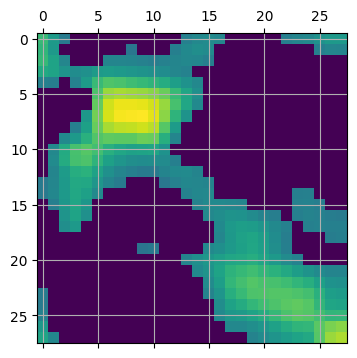

In [35]:
# same
X, srx, Y, sry = getTwoMFCCs(filesA[6], filesA[16])
X = sklearn.preprocessing.scale(X, axis=1)
Y = sklearn.preprocessing.scale(Y, axis=1)
xsim = librosa.segment.cross_similarity(Y, X, metric='cosine', mode='affinity')
plt.matshow(xsim)
plt.show()

c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\mchuv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarnin

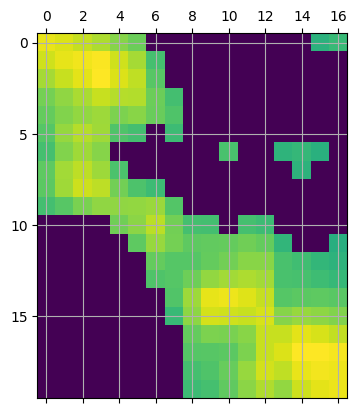

In [36]:
# different
X, srx, Y, sry = getTwoMFCCs(filesA[33], filesB[12])
X = sklearn.preprocessing.scale(X, axis=1)
Y = sklearn.preprocessing.scale(Y, axis=1)
xsim = librosa.segment.cross_similarity(Y, X, metric='cosine', mode='affinity')
plt.matshow(xsim)
plt.show()